# Table of Contents
## 1. Import Libraries and Data
## 2. Prep Data for Exploratory Analysis
## 3. Create Correlation Heat Map
## 4. Create Scatterplots
## 5. Create Pair Plots
## 6. Categorical Plot

In [39]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [40]:
#Import data
path = r"C:\Users\carol\Documents\Career Foundry\6 Advanced Analytics & Dashboard Design\A6 Project"
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'citibike.csv'), index_col = False)

# 2. Prep Data for Exploratory Analysis

In [41]:
df.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

In [42]:
#Create subset that excludes columns not needed for exploratory visual analysis (EVA)
df_eva = df.drop(['trip_id', 'bike_id', 'start_time', 'start_station_name', 'start_station_latitude', 'start_station_longitude',
                  'end_time', 'end_station_name', 'end_station_latitude', 'end_station_longitude'], axis=1)

In [43]:
#Check results
df_eva.columns

Index(['weekday', 'start_hour', 'start_station_id', 'end_station_id',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

In [44]:
df_eva.head()

,weekday,start_hour,start_station_id,end_station_id,trip_duration,subscriber,birth_year,gender
0,Mon,18,523,334,993,Subscriber,1968.0,2
1,Thu,18,257,236,581,Subscriber,1983.0,1
2,Wed,19,479,513,361,Subscriber,1989.0,1
3,Sat,11,527,441,561,Subscriber,1988.0,2
4,Sat,18,521,476,2296,Non-Subscriber,NaN,0


In [45]:
df_eva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   weekday           50000 non-null  object 
 1   start_hour        50000 non-null  int64  
 2   start_station_id  50000 non-null  int64  
 3   end_station_id    50000 non-null  int64  
 4   trip_duration     50000 non-null  int64  
 5   subscriber        50000 non-null  object 
 6   birth_year        43021 non-null  float64
 7   gender            50000 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.1+ MB


The records where birth_year is missing account for enough records that I don't want to remove or alter them lest I skew the data. Since those records are all non-subscribers and I'm curious if there's anything I can deduce about the non-subscribers since I don't have their age or gender, I'm going to do separate analyses for the subscribers and non-subscribers.

## Convert Weekdays to Numbers

In [46]:
df_eva['weekday'].value_counts(dropna = False)

Mon    7715
Sun    7319
Fri    7309
Wed    7228
Tue    7065
Thu    6857
Sat    6507
Name: weekday, dtype: int64

In [47]:
day = []

for value in df_eva['weekday']:
    if value == 'Sun':
        x = 0
        day.append(x)
    if value == 'Mon':
        x = 1
        day.append(x)
    if value == 'Tue':
        x = 2
        day.append(x)
    if value == 'Wed':
        x = 3
        day.append(x)
    if value == 'Thu':
        x = 4
        day.append(x)
    if value == 'Fri':
        x = 5
        day.append(x)
    if value == 'Sat':
        x = 6
        day.append(x)

In [48]:
day

[1,
 4,
 3,
 6,
 6,
 5,
 0,
 6,
 5,
 2,
 6,
 5,
 0,
 5,
 2,
 1,
 1,
 1,
 5,
 2,
 0,
 0,
 5,
 4,
 1,
 5,
 0,
 5,
 5,
 3,
 1,
 4,
 1,
 6,
 3,
 6,
 3,
 3,
 1,
 5,
 3,
 5,
 2,
 3,
 2,
 2,
 0,
 1,
 1,
 0,
 1,
 4,
 6,
 1,
 2,
 3,
 3,
 2,
 6,
 5,
 6,
 2,
 0,
 3,
 5,
 1,
 1,
 2,
 3,
 5,
 3,
 4,
 4,
 3,
 1,
 5,
 4,
 5,
 2,
 0,
 6,
 0,
 5,
 3,
 2,
 6,
 0,
 4,
 1,
 4,
 0,
 2,
 5,
 5,
 2,
 3,
 0,
 5,
 3,
 4,
 5,
 4,
 1,
 1,
 5,
 0,
 4,
 1,
 6,
 4,
 1,
 1,
 4,
 6,
 5,
 0,
 0,
 3,
 0,
 5,
 1,
 1,
 1,
 5,
 2,
 0,
 2,
 6,
 0,
 4,
 3,
 3,
 1,
 5,
 6,
 4,
 3,
 2,
 1,
 2,
 6,
 4,
 0,
 1,
 1,
 0,
 5,
 1,
 3,
 4,
 4,
 3,
 3,
 0,
 1,
 6,
 2,
 3,
 2,
 0,
 2,
 5,
 0,
 2,
 5,
 5,
 2,
 3,
 1,
 3,
 5,
 4,
 4,
 5,
 5,
 5,
 5,
 1,
 4,
 6,
 2,
 6,
 5,
 1,
 5,
 6,
 2,
 1,
 0,
 3,
 0,
 5,
 3,
 6,
 2,
 4,
 4,
 4,
 3,
 2,
 1,
 0,
 2,
 1,
 6,
 2,
 3,
 4,
 1,
 1,
 0,
 3,
 2,
 0,
 3,
 2,
 5,
 0,
 0,
 3,
 1,
 5,
 3,
 2,
 6,
 2,
 1,
 2,
 6,
 4,
 4,
 4,
 4,
 5,
 5,
 0,
 0,
 3,
 6,
 0,
 2,
 3,
 6,
 4,
 6,
 0,
 6,
 4,
 0,
 0,


In [49]:
#Add age list to dataframe
df_eva['day'] = day

In [50]:
#Drop weekday column
df_eva = df_eva.drop(['weekday'], axis=1)

In [51]:
#Check results
df_eva.head()

,start_hour,start_station_id,end_station_id,trip_duration,subscriber,birth_year,gender,day
0,18,523,334,993,Subscriber,1968.0,2,1
1,18,257,236,581,Subscriber,1983.0,1,4
2,19,479,513,361,Subscriber,1989.0,1,3
3,11,527,441,561,Subscriber,1988.0,2,6
4,18,521,476,2296,Non-Subscriber,NaN,0,6


## Make Separate Subscriber and Non-Subscriber DFs

In [52]:
#Make subscriber df
df_sub = df_eva[df_eva['subscriber'] == 'Subscriber']

In [53]:
#Check results
df_sub.head(15)

,start_hour,start_station_id,end_station_id,trip_duration,subscriber,birth_year,gender,day
0,18,523,334,993,Subscriber,1968.0,2,1
1,18,257,236,581,Subscriber,1983.0,1,4
2,19,479,513,361,Subscriber,1989.0,1,3
3,11,527,441,561,Subscriber,1988.0,2,6
5,22,293,432,427,Subscriber,1986.0,2,5
6,13,380,317,639,Subscriber,1994.0,1,0
7,10,346,212,263,Subscriber,1969.0,1,6
8,12,510,422,666,Subscriber,1993.0,1,5
9,16,446,342,582,Subscriber,1983.0,1,2
11,23,251,460,1250,Subscriber,1985.0,1,5


In [54]:
#Drop subscriber column
df_sub = df_sub.drop(['subscriber'], axis = 1)

In [55]:
#Make non-subscriber df
df_non_sub = df_eva[df_eva['subscriber'] == 'Non-Subscriber']

In [56]:
#Check results
df_non_sub.head(15)

,start_hour,start_station_id,end_station_id,trip_duration,subscriber,birth_year,gender,day
4,18,521,476,2296,Non-Subscriber,NaN,0,6
10,20,457,512,1313,Non-Subscriber,NaN,0,6
17,18,363,514,1751,Non-Subscriber,NaN,0,1
26,16,389,389,478,Non-Subscriber,NaN,0,0
46,22,426,247,1016,Non-Subscriber,NaN,0,0
52,18,384,389,2697,Non-Subscriber,NaN,0,6
58,11,2000,418,192,Non-Subscriber,NaN,0,6
62,14,379,470,649,Non-Subscriber,NaN,0,0
67,13,519,281,1626,Non-Subscriber,NaN,0,2
70,19,427,316,1422,Non-Subscriber,NaN,0,3


In [57]:
#Drop subscriber, birth year, and gender columns
df_non_sub = df_non_sub.drop(['subscriber', 'birth_year', 'gender'], axis = 1)

In [58]:
#Check results
df_non_sub.head()

,start_hour,start_station_id,end_station_id,trip_duration,day
4,18,521,476,2296,6
10,20,457,512,1313,6
17,18,363,514,1751,1
26,16,389,389,478,0
46,22,426,247,1016,0


# 3. Create Correlation Heatmap

## Subscriber Heatmap

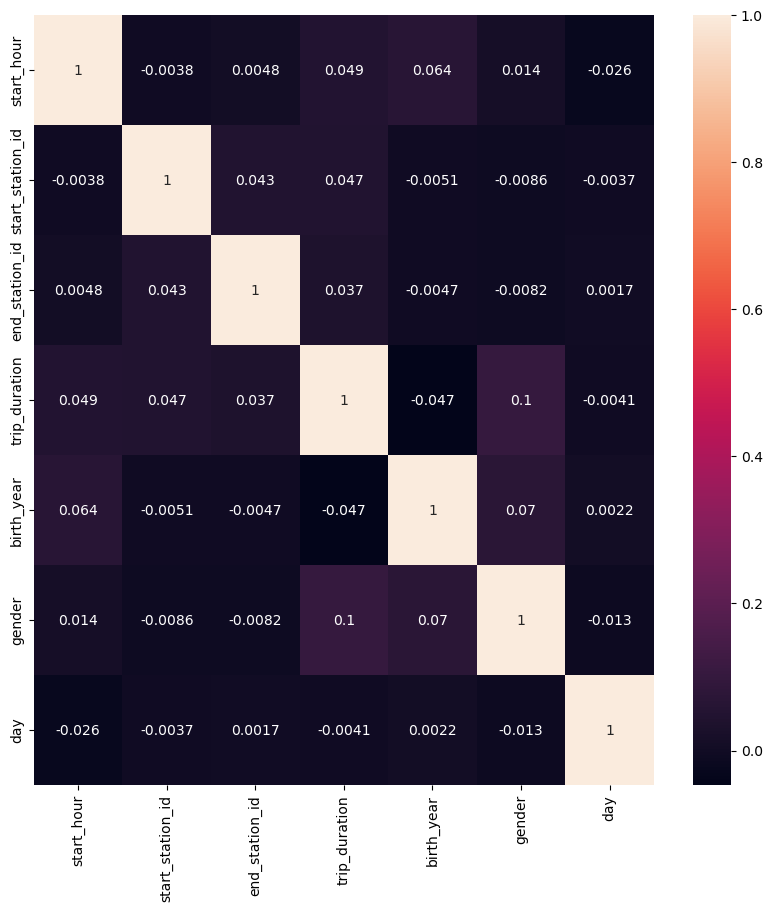

In [59]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In a correlation heatmap, values close to 1 indicate a strong positive correlation, and values close to -1 indicate a strong negative correlation. Based on this heat map, there are no combinations of variables with a strong positive or negative correlation. The strongest correlation occurs between gender and trip duration, but that only has a value of 0.1 so it's very weak.

## Non-Subscriber Heatmap

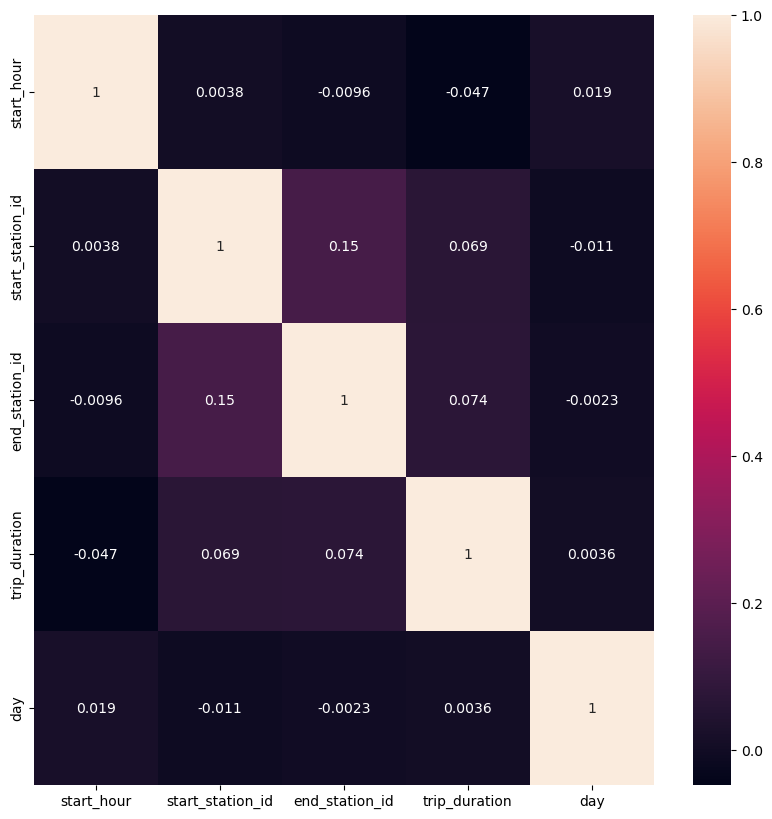

In [60]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr2 = sns.heatmap(df_non_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Similar to the subscriber correlation map, the non-subscriber map does not show any strong correlations. The strongest correlation occurs between start and end station IDs at a value of 0.15. Maybe this means that non-subscribers are slightly more likely to have a final destination that correlates to their starting point? For example, tourists that don't have Citibike in their home towns (and therefore would be less likely to be subscribers) are probably going to be using Citibike to get to more popular tourist destinations in the city and may follow certain paths or guides on their trip. 

# 4. Create Scatterplot(s)

## Subscriber Data

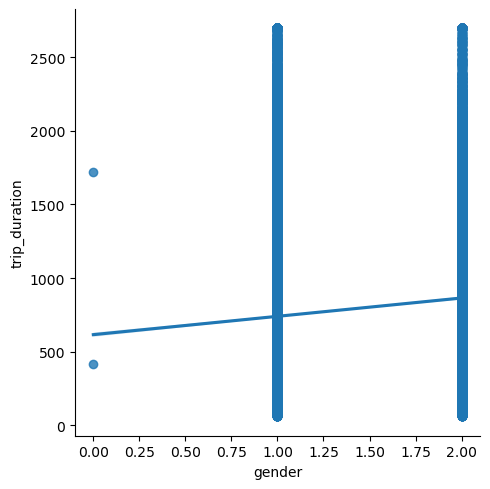

In [61]:
# Gender vs. trip duration scatterplot
sns.lmplot(x = 'gender', y = 'trip_duration', data = df_sub)

This scatterplot shows the slightly positive relationship between trip_duration and gender. Based on the values at 0, there are a few subscribers with gender set to 0. Assuming 1 indicates male and 2 indicates female, this would imply that women tend to take slightly longer trips. This could be due to the distance between start and end points, foot traffic, and/or the average speed men vs. women tend to travel at.

## Non-Subscriber Data

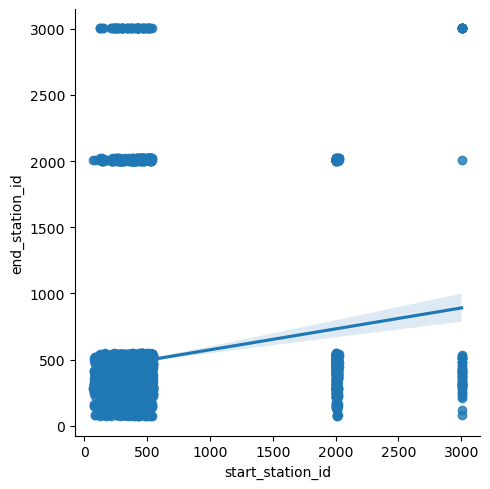

In [62]:
# Rank vs. fastest lap speed 
sns.lmplot(x = 'start_station_id', y = 'end_station_id', data = df_non_sub)

At this time I don't know much about the station IDs or how they are assigned (i.e. if they're assigned randomly or in a particular order). However, as I posited after the correlation heat map, I think this correlation could indicate tourists (more likely to be non-subscribers) following certain routes for sight seeing.

# 5. Create Pair Plot

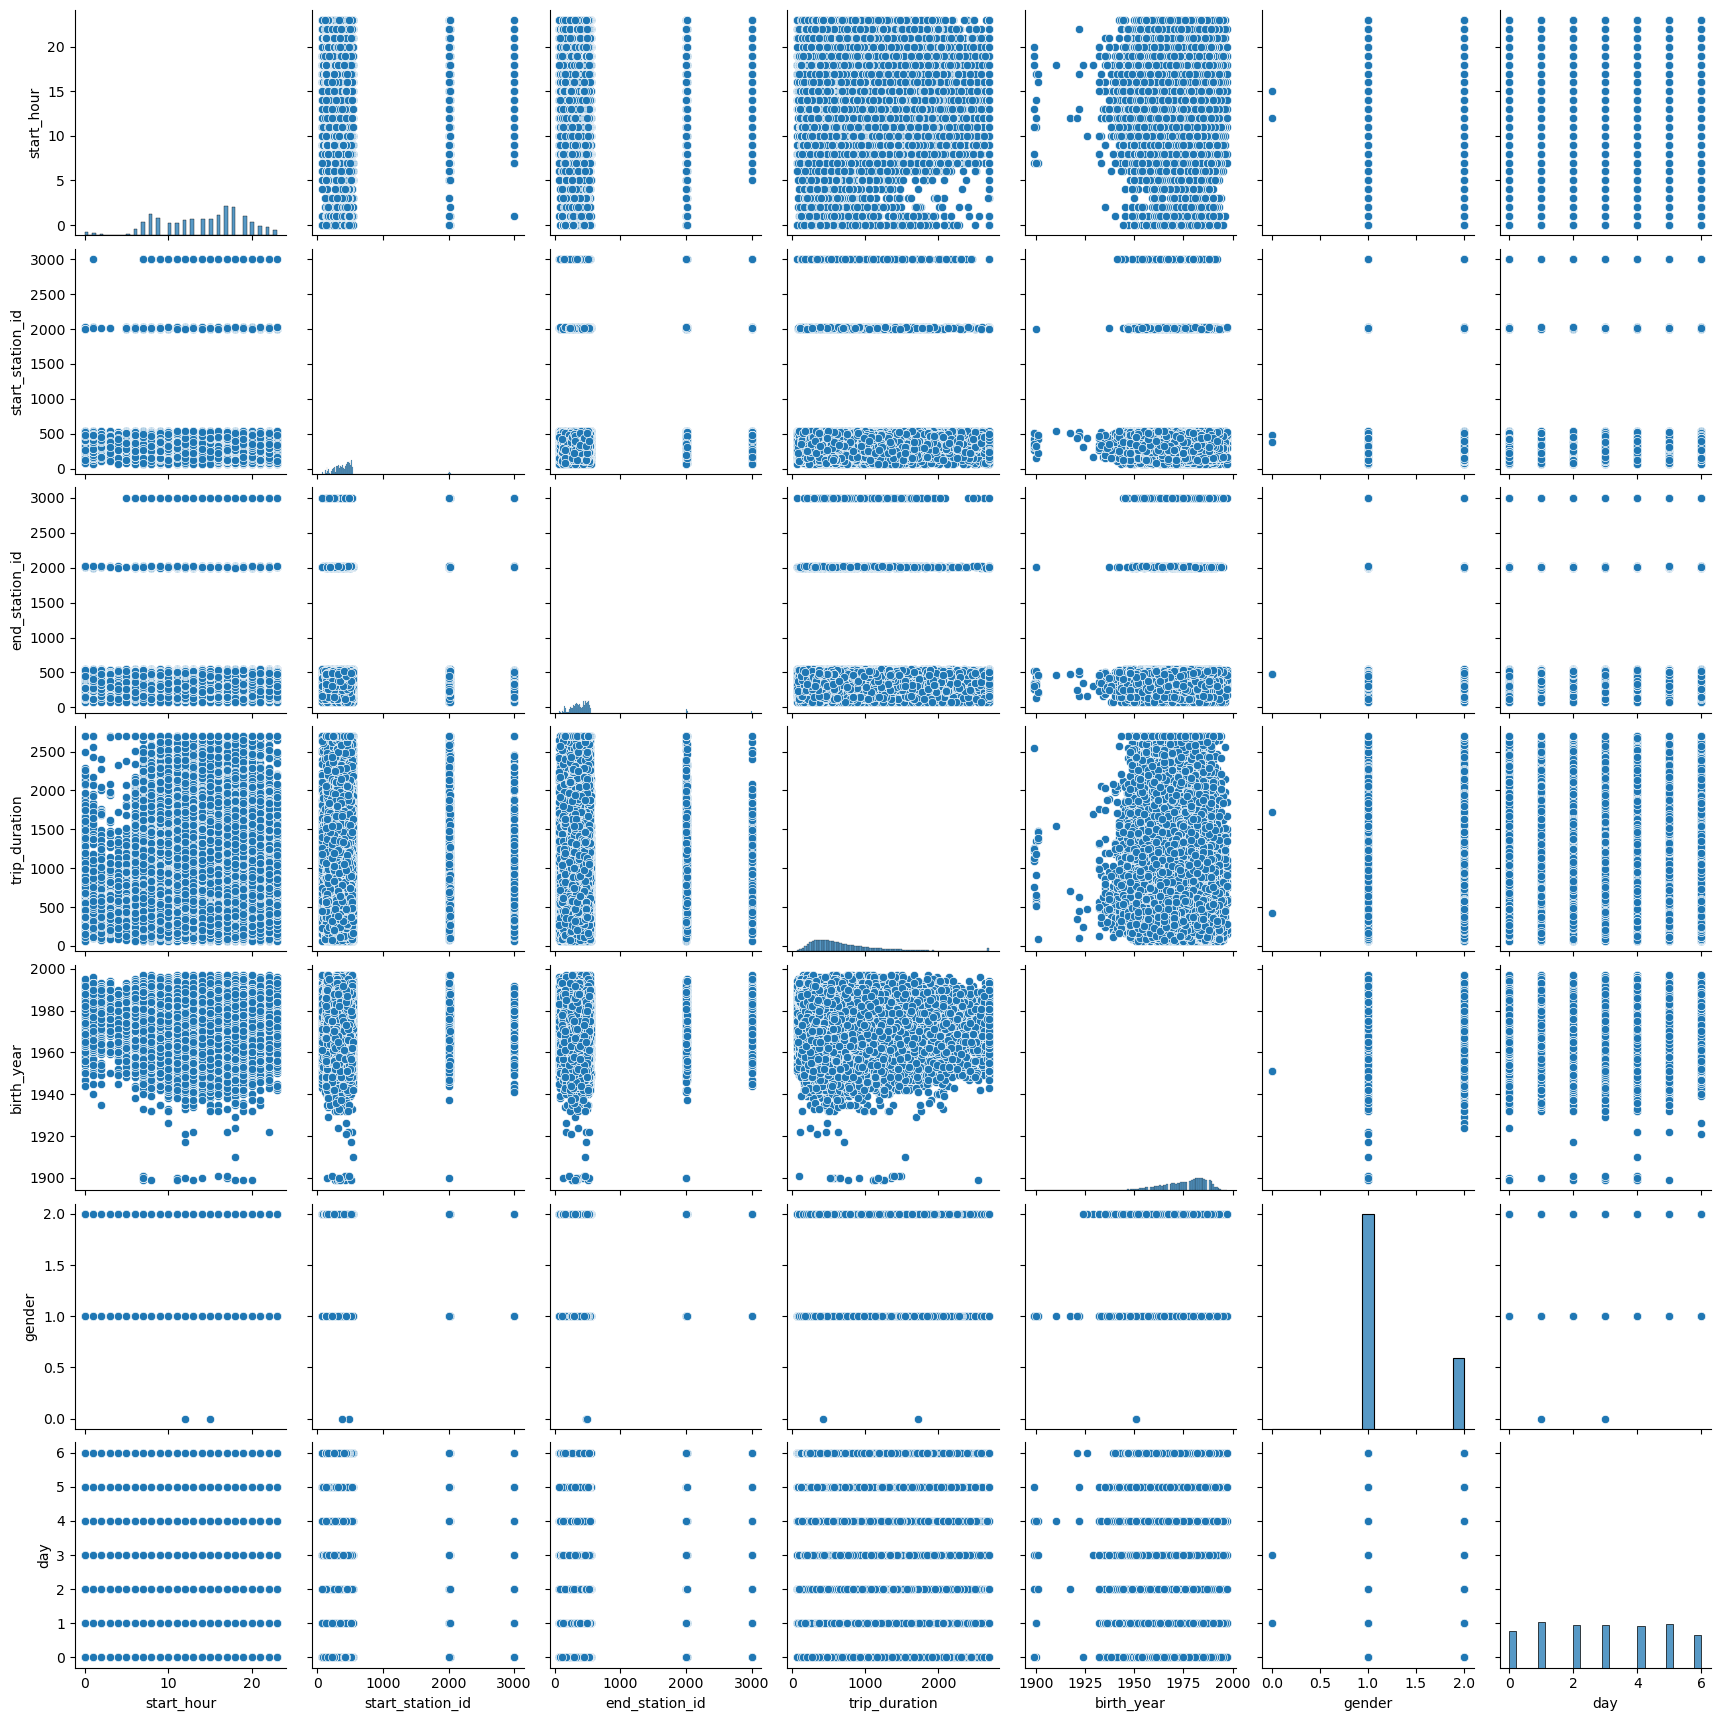

In [63]:
#Create pair plot with subscriber dataframe
pair = sns.pairplot(df_sub)

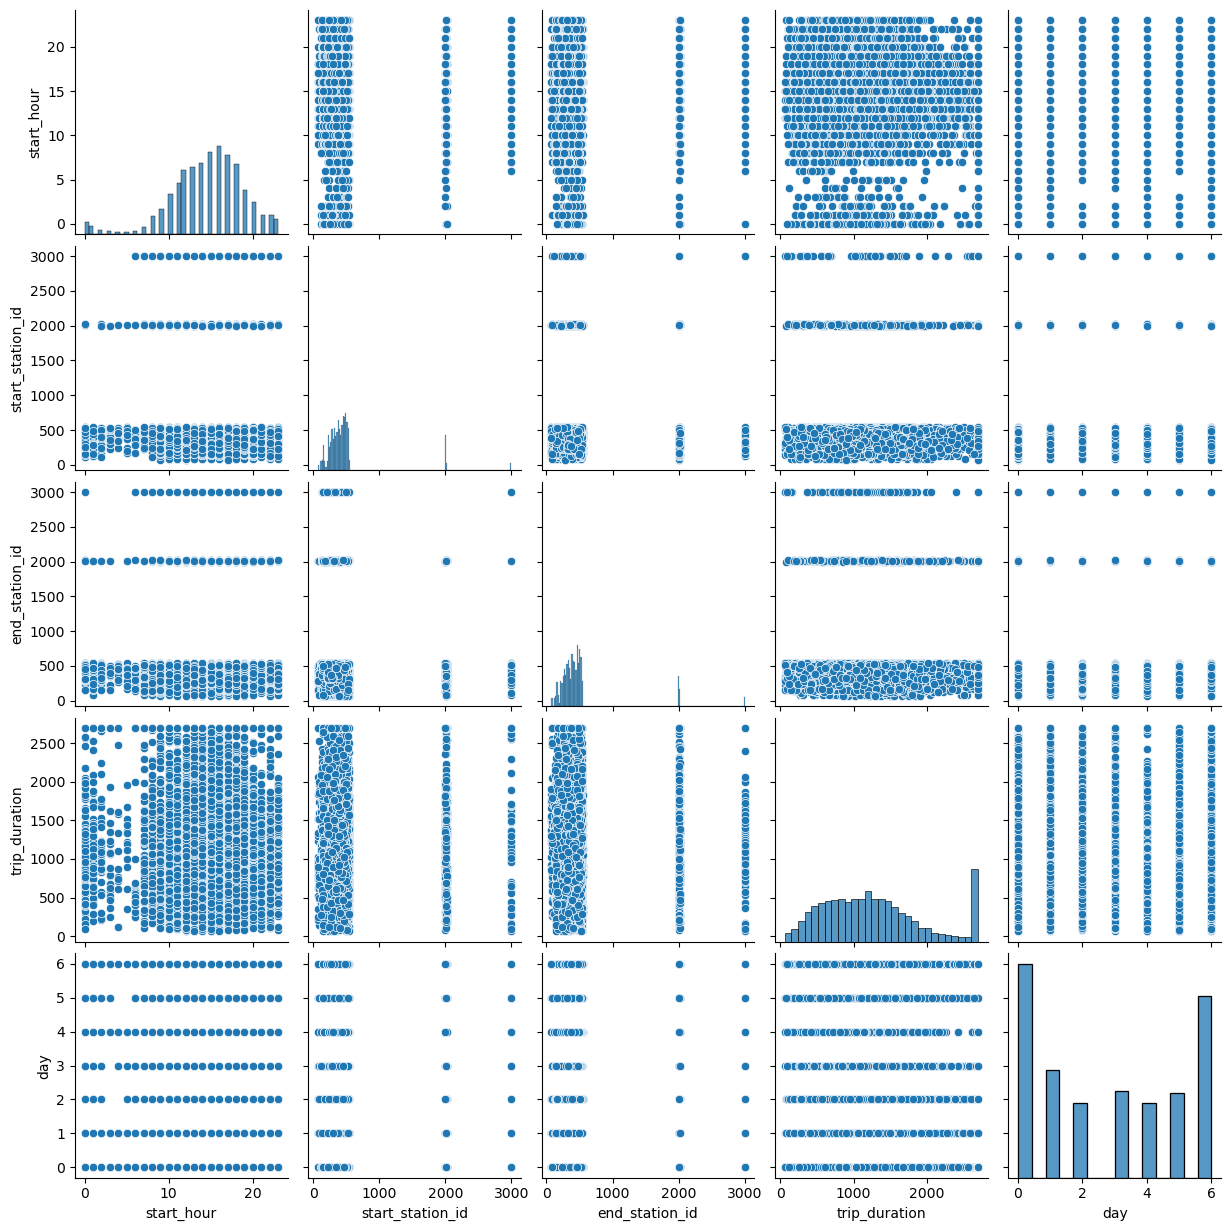

In [64]:
#Create pair plot with non-subscriber dataframe
pair = sns.pairplot(df_non_sub)

Everything looks pretty evenly distributed for both the subscriber and non-subscriber data sets. 

# 6. Categorical Plot

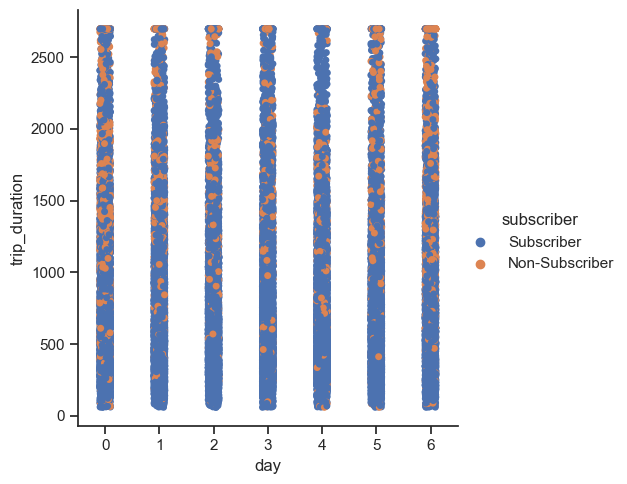

In [66]:
#Explore variance in day and trip duration for subscribers vs. non-subscribers
sns.set(style="ticks")
g = sns.catplot(x="day", y="trip_duration", hue="subscriber", data=df_eva)

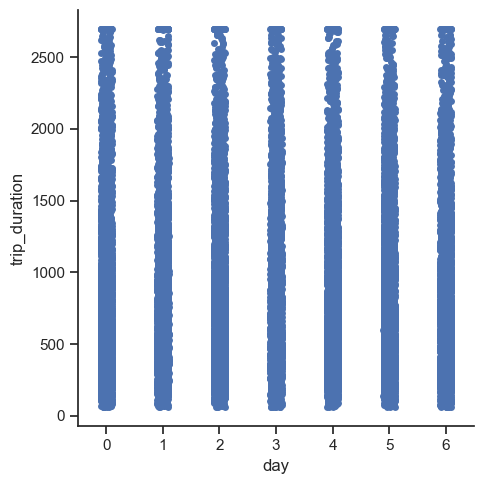

In [67]:
#Visualize day vs. trip duration just for subscribers
g = sns.catplot(x="day", y="trip_duration", data=df_sub)

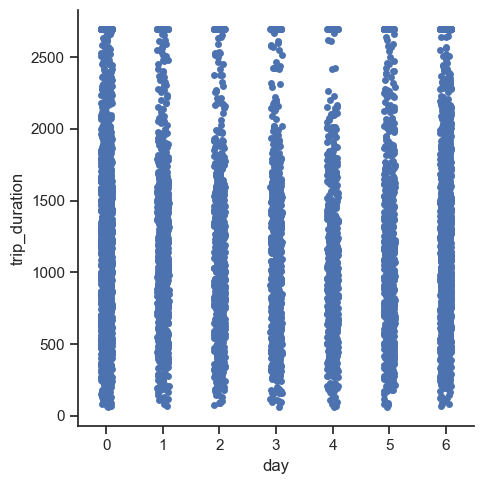

In [68]:
#Visualize day vs. trip duration just for non-subscribers
g = sns.catplot(x="day", y="trip_duration", data=df_non_sub)

Based on these results, it looks like subscribers are more likely to use Citi Bike for longer commutes. Non-subscribers frequency of longer trips is especially sparse on days 2-4 (Tuesday, Wednesday, and Thursday).